In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt

In [6]:
comment_data = pd.read_csv('C:\\Users\\acorn\\Desktop\\Opensource\\Python\\Text Crawling\\아름송이\\comment/아름송이_comment_1.csv')

In [7]:
comment_data

,Unnamed: 0,youtube_id,comment,like_num
0,0,areumsongee아름송이,"매그넘 루비는 CU, GS25, 마켓컬리에서 구매 할 수 있어요!!\n렌즈는 렌시스...",23개
1,1,XIANC,I honestly can't understand how someone can be...,6개
2,2,Twaddlex,*당신은 너무 귀엽고 아름답습니다*🤍🤍,9개
3,3,risam,いつもメイク動画楽しく見させてもらっていて、ほんとにソンイちゃんはいつ見ても綺麗で同じ女性と...,19개
4,4,tasiyuso,ソンイちゃんのメイクとか参考にさせていただいてます！ほんと可愛くて大好きです！日本から応援さ...,9개
...,...,...,...,...
76,76,tomoF,IloveU,1개
77,77,Miko,Enak pasti,1개
78,78,NaN,귀여워요💕💕💕,3개
79,79,NaN,ほんとに可愛い、、使ってるコスメ全部欲しくなる🥺🥺,1개


In [8]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [9]:
comment_list = []
for i in range(len(comment_data)):
    comment_list.append(comment_data['comment'].iloc[i])

In [12]:
comment_result = []

for i in comment_list:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])

In [13]:

comment_result

,comment
0,매그넘 루비는 CU GS25 마켓컬리에서 구매 할 수 있어요렌즈는 렌시스 신디 그레...
1,I honestly can't understand how someone can be...
2,*당신은 너무 귀엽고 아름답습니다*🤍🤍
3,いつもメイク動画楽しく見させてもらっていて、ほんとにソンイちゃんはいつ見ても綺麗で同じ女性と...
4,ソンイちゃんのメイクとか参考にさせていただいてます！ほんと可愛くて大好きです！日本から応援さ...
...,...
76,IloveU
77,Enak pasti
78,귀여워요
79,ほんとに可愛い、、使ってるコスメ全部欲しくなる🥺🥺


# 형태소 분석기를 통한 명사 추출

In [9]:

#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용

In [10]:
from konlpy.tag import Twitter

def get_noun(comment_txt):
    twitter = Twitter()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

D:\anaconda31\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [11]:
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

D:\anaconda31\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:

comment_result

,comment,token
0,우리 리를 레이리스 앤 제늘맨 제가 드디어 MBTI 성격 유형 검사라는 걸 해봤어요...,"[우리, 리, 레이, 리스, 앤, 늘맨, 제, 성격, 유형, 검사, 걸, 오오, 결..."
1,타임라인❤(틀린게 있으면 말해주세요고칠께요)0:07:인사❤및 오프닝0:11:마스크로...,"[타임, 라인, 말, 인사, 및, 오프닝, 마스크, 메이크업, 추천, 픽, 파우더,..."
2,오늘 완젼 아리아나그란데 재질…사배아나그란데 사랑해요,"[오늘, 완젼, 아리아나, 데, 재질, 배아, 데, 사랑]"
3,메이크업 무슨일이야 언니가 너무 예뻐서 집중안됨,"[메이크업, 일이, 언니, 집중]"
4,메포 픽서 진짜 분무기 같아서 비추 (얼굴도 좀 가려운 느낌) 복합성 수부지 민감성...,"[메포, 픽, 진짜, 분무기, 얼굴, 좀, 느낌, 복합, 부지, 민감, 투쿨, 포스..."
5,진짜 제 마음 속의 뷰튜버 원탑 중간에 픽서 뿌리실 때 입자 더 잘 보이라고 배경 ...,"[진짜, 제, 마음, 속, 뷰튜버, 탑, 중간, 픽, 때, 입자, 더, 보이, 배경..."
6,헐 이날 메이크업 너무 예뻐요 저거 흰색라인 저거 나도 따라해보고 싶어요 영상 만들...,"[날, 메이크업, 거, 흰색, 라인, 거, 영상, 여름]"
7,꺄 언니 오늘 메컵 넘예쁜거 아님니꽈 오늘메이크업 가능하면 투툐리얼로 보고싶어요오,"[꺄, 언니, 오늘, 메컵, 꽈, 오늘, 메이크업, 투툐리얼, 오]"
8,헤어스타일 어케 하신거에요이쁘시당,"[헤어스타일, 어케]"
9,언니 어반디케이 픽서 언니의 지겹템은 어디간거에요오,"[언니, 어, 디케이, 픽, 언니, 템, 어디, 오]"


# wordcloud 란?
- 자연어처리(NLP)시에 doc에서 언급된 단어들의 빈도수를 파악해서 빈도수가 높은 단어일 수록 크게 빈도수가 낮은 단어일 수록 작게 표현하는 시각화 기법.



In [14]:
from collections import Counter
from wordcloud import WordCloud
#import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

In [15]:
noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])

In [16]:
counts = Counter(noun_list)
tags = counts.most_common(30)

In [17]:
tags = counts.most_common(30)

In [18]:
#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

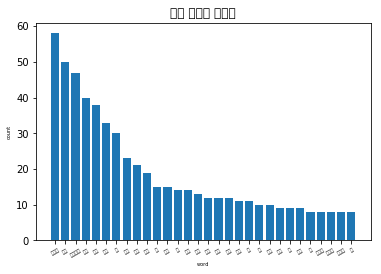

In [19]:
index = np.arange(len(test))
plt.bar(index,test['count'].tolist() )
plt.xlabel('word', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.xticks(index, test['word'].tolist(), fontsize=5, rotation=30)
plt.title('단어 빈도수 시각화')
plt.show()

{'파우더': 58, '언니': 50, '메이크업': 47, '영상': 40, '사배': 38, '오늘': 33, '픽': 30, '픽서': 23, '추천': 21, '진짜': 19, '더': 15, '화장': 15, '때': 14, '제품': 14, '사용': 13, '경우': 12, '고정': 12, '때문': 12, '수정': 11, '것': 11, '이': 10, '혹시': 10, '부분': 9, '후': 9, '요즘': 9, '제': 8, '마스크': 8, '베이스': 8, '미스트': 8, '수': 8}


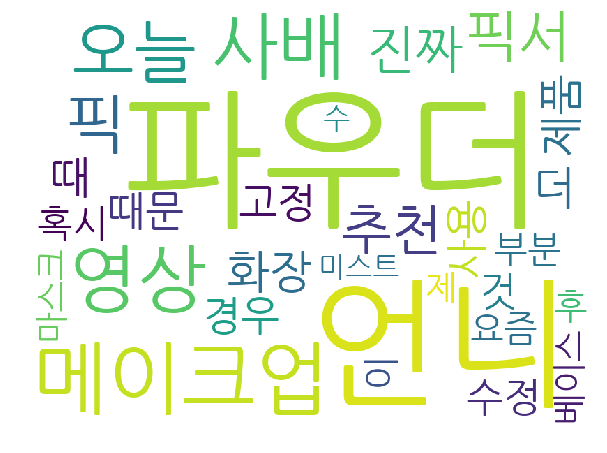

In [21]:
wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=800, height=600)

print(dict(tags))
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()